In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score

In [7]:
df = pd.read_csv('train.csv' , usecols = ["Age" , "Fare" , "Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [10]:
df["Age"].fillna(df['Age'].mean() ,inplace = True)

In [11]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size = 0.2 , random_state = 0)

C:\Users\Parveen\AppData\Local\Temp\ipykernel_5136\2242168548.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


Text(0.5, 1.0, 'Age Q-Q Plot')

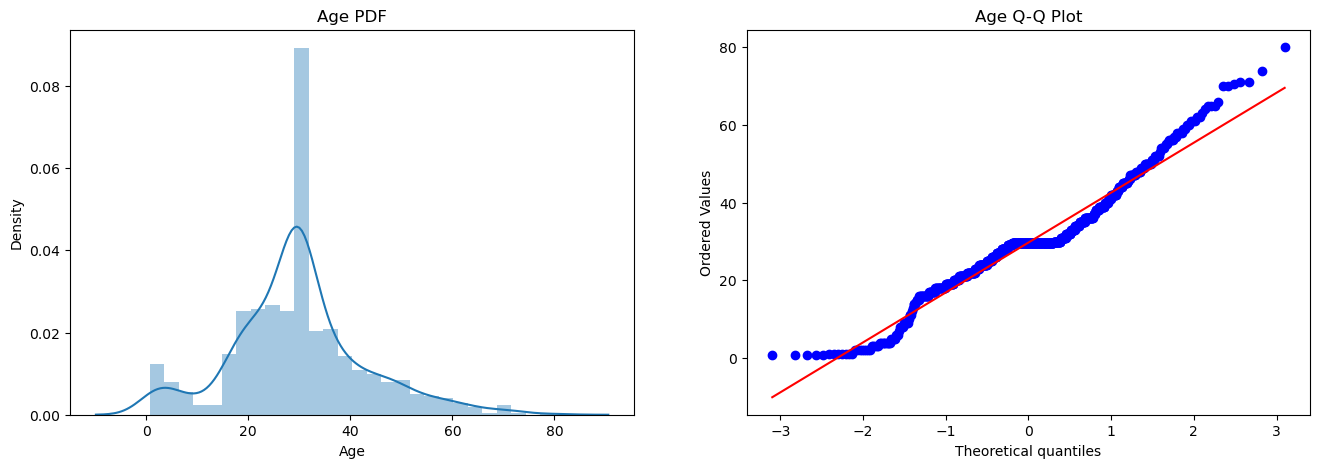

In [17]:
plt.figure(figsize = (16, 5))
plt.subplot(1 ,2 , 1)
sns.distplot(X_train['Age'])
plt.title("Age PDF")

plt.subplot(1 , 2, 2)
stats.probplot(X_train['Age'] , dist = 'norm' , plot = plt)
plt.title("Age Q-Q Plot")

C:\Users\Parveen\AppData\Local\Temp\ipykernel_5136\3785868637.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


Text(0.5, 1.0, 'Fare Q-Q Plot')

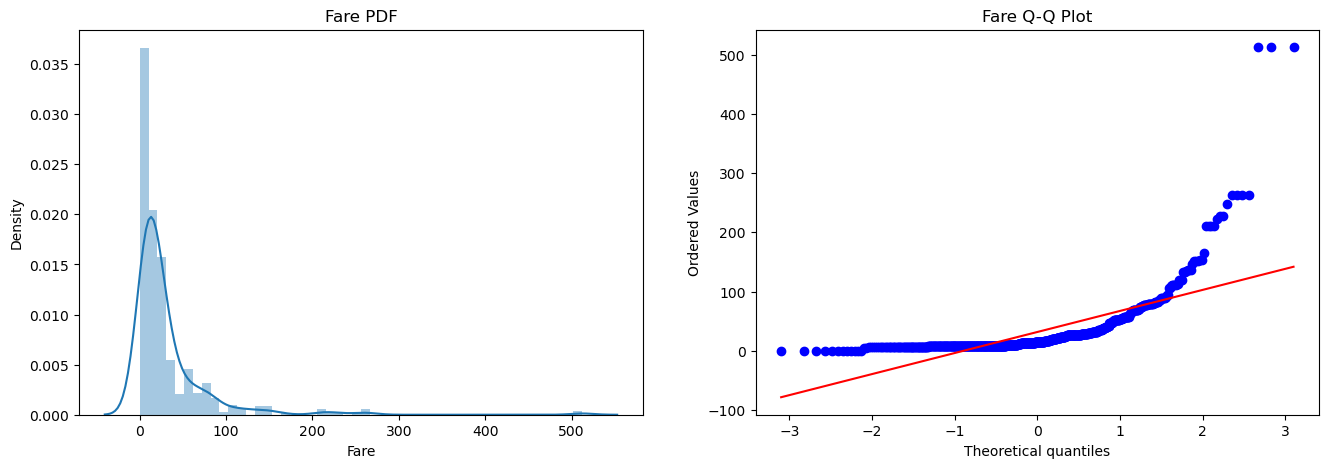

In [18]:
plt.figure(figsize = (16, 5))
plt.subplot(1 ,2 , 1)
sns.distplot(X_train['Fare'])
plt.title("Fare PDF")

plt.subplot(1 , 2, 2)
stats.probplot(X_train['Fare'] , dist = 'norm' , plot = plt)
plt.title("Fare Q-Q Plot")

In [19]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()

In [21]:
lr.fit(X_train, y_train)
dt.fit(X_train , y_train)

DecisionTreeClassifier()

In [22]:
y_pred = lr.predict(X_test)
y_pred1 = dt.predict(X_test)

In [23]:
print('Accuracy_score of lr is ' , accuracy_score(y_pred , y_test))
print('Accuracy_score of dt is ' , accuracy_score(y_pred1 , y_test))

Accuracy_score of lr is  0.6983240223463687
Accuracy_score of dt is  0.664804469273743


In [24]:
trf = FunctionTransformer(func = np.log1p)

In [29]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [30]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.7039106145251397
Accuracy DT 0.6759776536312849


In [31]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6633333333333333


Text(0.5, 1.0, 'Fare After Transformation')

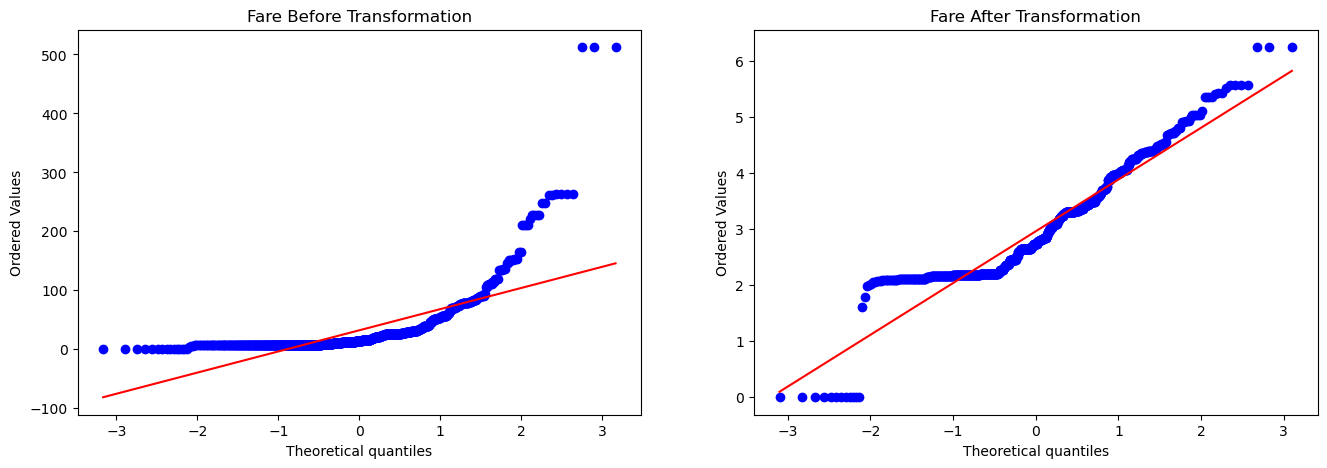

In [33]:
plt.figure(figsize = (16, 5))
plt.subplot(1 , 2, 1)
stats.probplot(X['Fare'] , dist = 'norm' , plot = plt)
plt.title("Fare Before Transformation")

plt.subplot(1 , 2, 2)
stats.probplot(X_train_transformed['Fare'], dist = 'norm' , plot = plt)
plt.title('Fare After Transformation')

Text(0.5, 1.0, 'Age After Transformation')

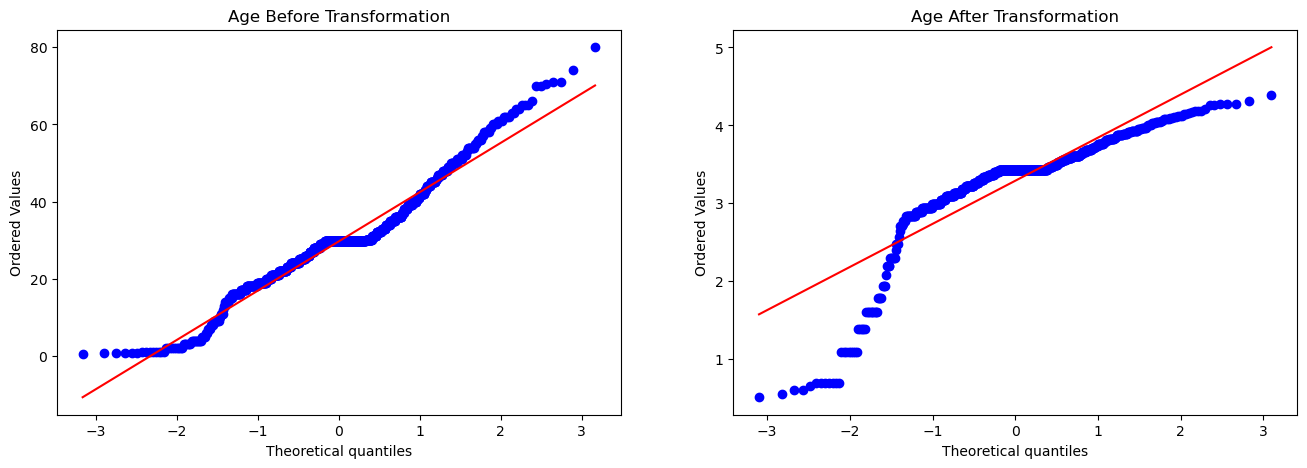

In [34]:
plt.figure(figsize = (16, 5))
plt.subplot(1 , 2, 1)
stats.probplot(X['Age'] , dist = 'norm' , plot = plt)
plt.title("Age Before Transformation")

plt.subplot(1 , 2, 2)
stats.probplot(X_train_transformed['Age'], dist = 'norm' , plot = plt)
plt.title('Age After Transformation')

In [41]:
def apply_transformation(transform):
    X = df.drop(columns = ['Survived'])
    y = df['Survived']
    trf = ColumnTransformer([('log' , FunctionTransformer(transform) , ['Fare'])], remainder = 'passthrough')
    X_trans = trf.fit_transform(X)
    clf = LogisticRegression()
    print("Accuracy_score is " , np.mean(cross_val_score(clf, X_trans , y , scoring = "accuracy" , cv =10)))
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy_score is  0.6712609238451936


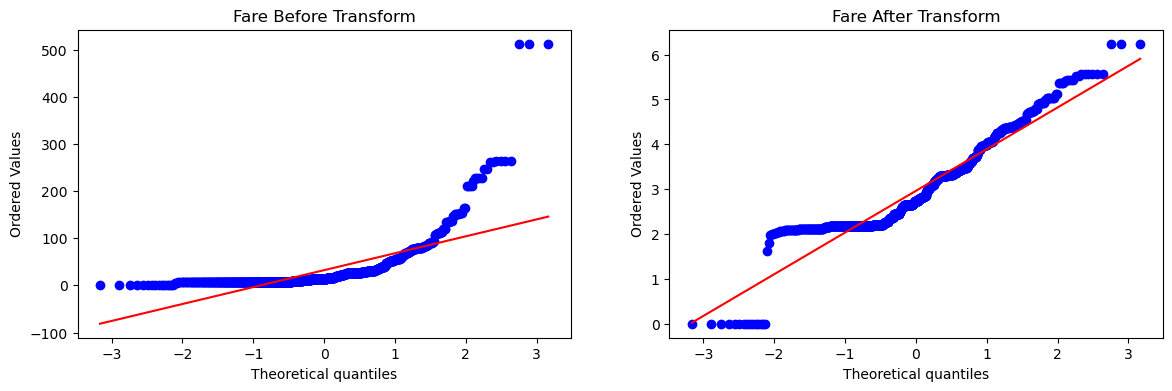

In [42]:
apply_transformation(np.log1p)